In [1]:
!pip install pandas nltk scikit-learn numpy

In [2]:
# Download the dataset directly from GitHub as 'spam.csv'
!wget https://raw.githubusercontent.com/babar-a11y/AI-BS_AI-3-1-/main/spam.csv

--2025-12-08 14:50:35--  https://raw.githubusercontent.com/babar-a11y/AI-BS_AI-3-1-/main/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480130 (469K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 468.88K  --.-KB/s    in 0.04s   

2025-12-08 14:50:36 (12.8 MB/s) - ‘spam.csv’ saved [480130/480130]



In [12]:
import pandas as pd

# Load dataset
data = pd.read_csv("spam.csv")  # change filename if needed

print("------ Dataset Description ------")
print("Total emails:", len(data))
print("Columns:", data.columns)

# Count spam and ham emails
spam_count = (data['Category'] == 'spam').sum()
ham_count = (data['Category'] == 'ham').sum()

print("Spam emails:", spam_count)
print("Ham emails:", ham_count)

print("\nPercentage:")
print("Spam %:", (spam_count / len(data)) * 100)
print("Ham %:", (ham_count / len(data)) * 100)

------ Dataset Description ------
Total emails: 5572
Columns: Index(['Category', 'Message'], dtype='object')
Spam emails: 747
Ham emails: 4825

Percentage:
Spam %: 13.406317300789663
Ham %: 86.59368269921033


In [3]:
import pandas as pd

# Replace 'spam.csv' with your file's name
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()  # Preview the first 5 rows

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = df[['Category', 'Message']]  # Keep only relevant columns

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
    if pd.isna(text):
        text = ''
    text = text.lower()
    text = re.sub(r'http[s]?://\S+', '', text)  # Remove URLs
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Combine columns if needed (e.g., subject + message)
df['cleaned_text'] = df['Message'].apply(preprocess_text)  # Adjust 'text' to your column name
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})  # Encode labels
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Category,Message,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [6]:
df['cleaned_text'] = (df['Message'].fillna('')).apply(preprocess_text)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [8]:
import nltk
nltk.download('punkt_tab')

new_email = "Free offer! Click to win $1000 now!"  # Adjust based on your dataset's format
new_email_cleaned = preprocess_text(new_email)
new_email_vector = vectorizer.transform([new_email_cleaned])
prediction = model.predict(new_email_vector)
print("Prediction (1=spam, 0=ham):", prediction[0])

Prediction (1=spam, 0=ham): 1


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
import joblib
joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

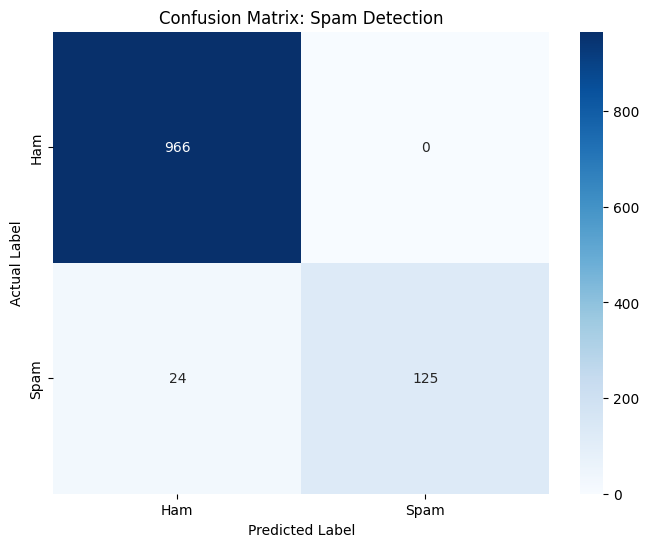

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Spam Detection')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert text to numbers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message'])

# Labels
y = data['Category'].map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("\n------ Quantitative Analysis ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


------ Quantitative Analysis ------
Accuracy: 0.9814593301435407
Precision: 0.9396551724137931
Recall: 0.9276595744680851
F1 Score: 0.9336188436830836


In [15]:
import numpy as np

feature_names = np.array(vectorizer.get_feature_names_out())
class_prob = model.feature_log_prob_

# Get top spam words
top_spam = class_prob[1].argsort()[-20:]  # last 20 high-probability words
print("\n------ Qualitative Analysis: Top Spam Words ------")

for word in feature_names[top_spam]:
    print(word)



------ Qualitative Analysis: Top Spam Words ------
with
and
mobile
text
stop
from
have
on
ur
is
txt
for
free
or
now
the
your
you
call
to


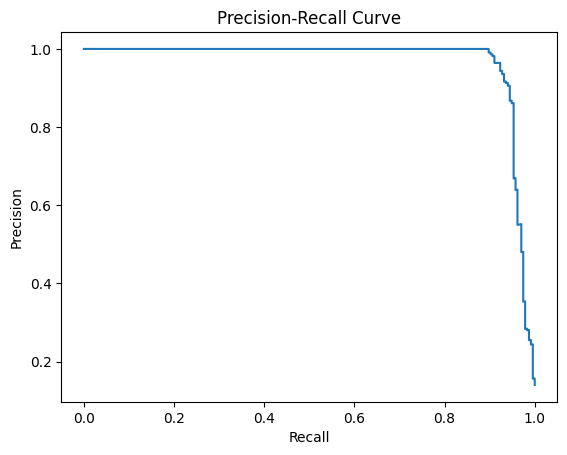

In [16]:
from sklearn.metrics import precision_recall_curve

probs = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [20]:
# =================== EMAIL SPAM DETECTION (NAIVE BAYES) ===================

# Install required library
!pip install -q scikit-learn joblib

# Import libraries
import pandas as pd
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# ------------------- LOAD DATASET -------------------
# Make sure your CSV file has columns: message, label (spam/ham)

data = pd.read_csv("spam.csv")   # change name if needed

# Convert labels to numbers
X = data['Message']
y = data['Category'].map({'ham': 0, 'spam': 1})

print("✅ Dataset loaded successfully!")

# ------------------- TRAIN MODEL -------------------

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

model = MultinomialNB()
model.fit(X_vec, y)

print("✅ Model trained successfully!")

# ------------------- SAVE MODEL -------------------
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Model saved as spam_model.pkl")

# ------------------- LOAD MODEL -------------------
model = joblib.load("spam_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

print("✅ Model loaded for prediction!")

# ------------------- FUNCTION TO CHECK EMAIL -------------------

def check_email(text):
    text_vec = vectorizer.transform([text])
    pred = model.predict(text_vec)[0]
    return "🚫 SPAM EMAIL" if pred == 1 else "✅ HAM (SAFE) EMAIL"

# ------------------- USER INPUT LOOP -------------------

while True:
    email = input("\nEnter an email to check (or type 'exit' to stop): ")

    if email.lower() == 'exit':
        print("Program stopped.")
        break

    print("Result:", check_email(email))


✅ Dataset loaded successfully!
✅ Model trained successfully!
✅ Model saved as spam_model.pkl
✅ Model loaded for prediction!

Enter an email to check (or type 'exit' to stop): The Faculty of Computing invites you to leverage the NAVTTC-funded diploma courses—an exceptional, fully sponsored learning opportunity designed to strengthen your professional edge. These short-term certifications are aligned with evolving industry demands and offer a fast-track route to upskilling in high-impact technology domains.  Key Highlights:  Industry-led curriculum designed around emerging market needs  Seasoned expert trainers delivering practical, real-world insights  High-demand tracks including AI, Cybersecurity, Digital Marketing, UI/UX, eCommerce, Animation & more  Zero cost—premium certifications fully funded for eligible learners  Career-boosting credentials to enhance your portfolio and employability  Limited seats—early registration recommended     Muhammad Moiz Abdullah  PS to Dean | Faculty o